In [1]:
import scanpy as sc
import pandas as pd

# Load your processed single-cell dataset
adata = sc.read_h5ad("../data/hb_tumor_data.h5ad")

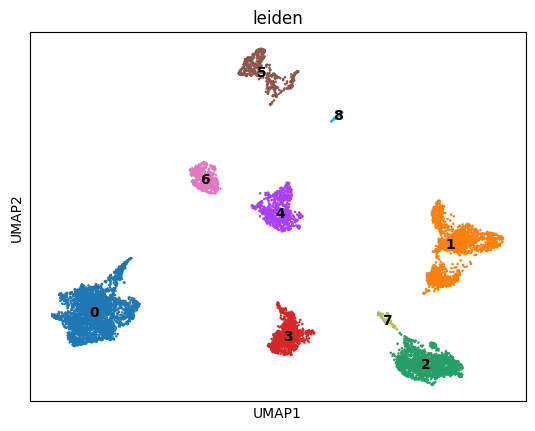

In [3]:
sc.pl.umap(adata, color = 'leiden', legend_loc='on data')

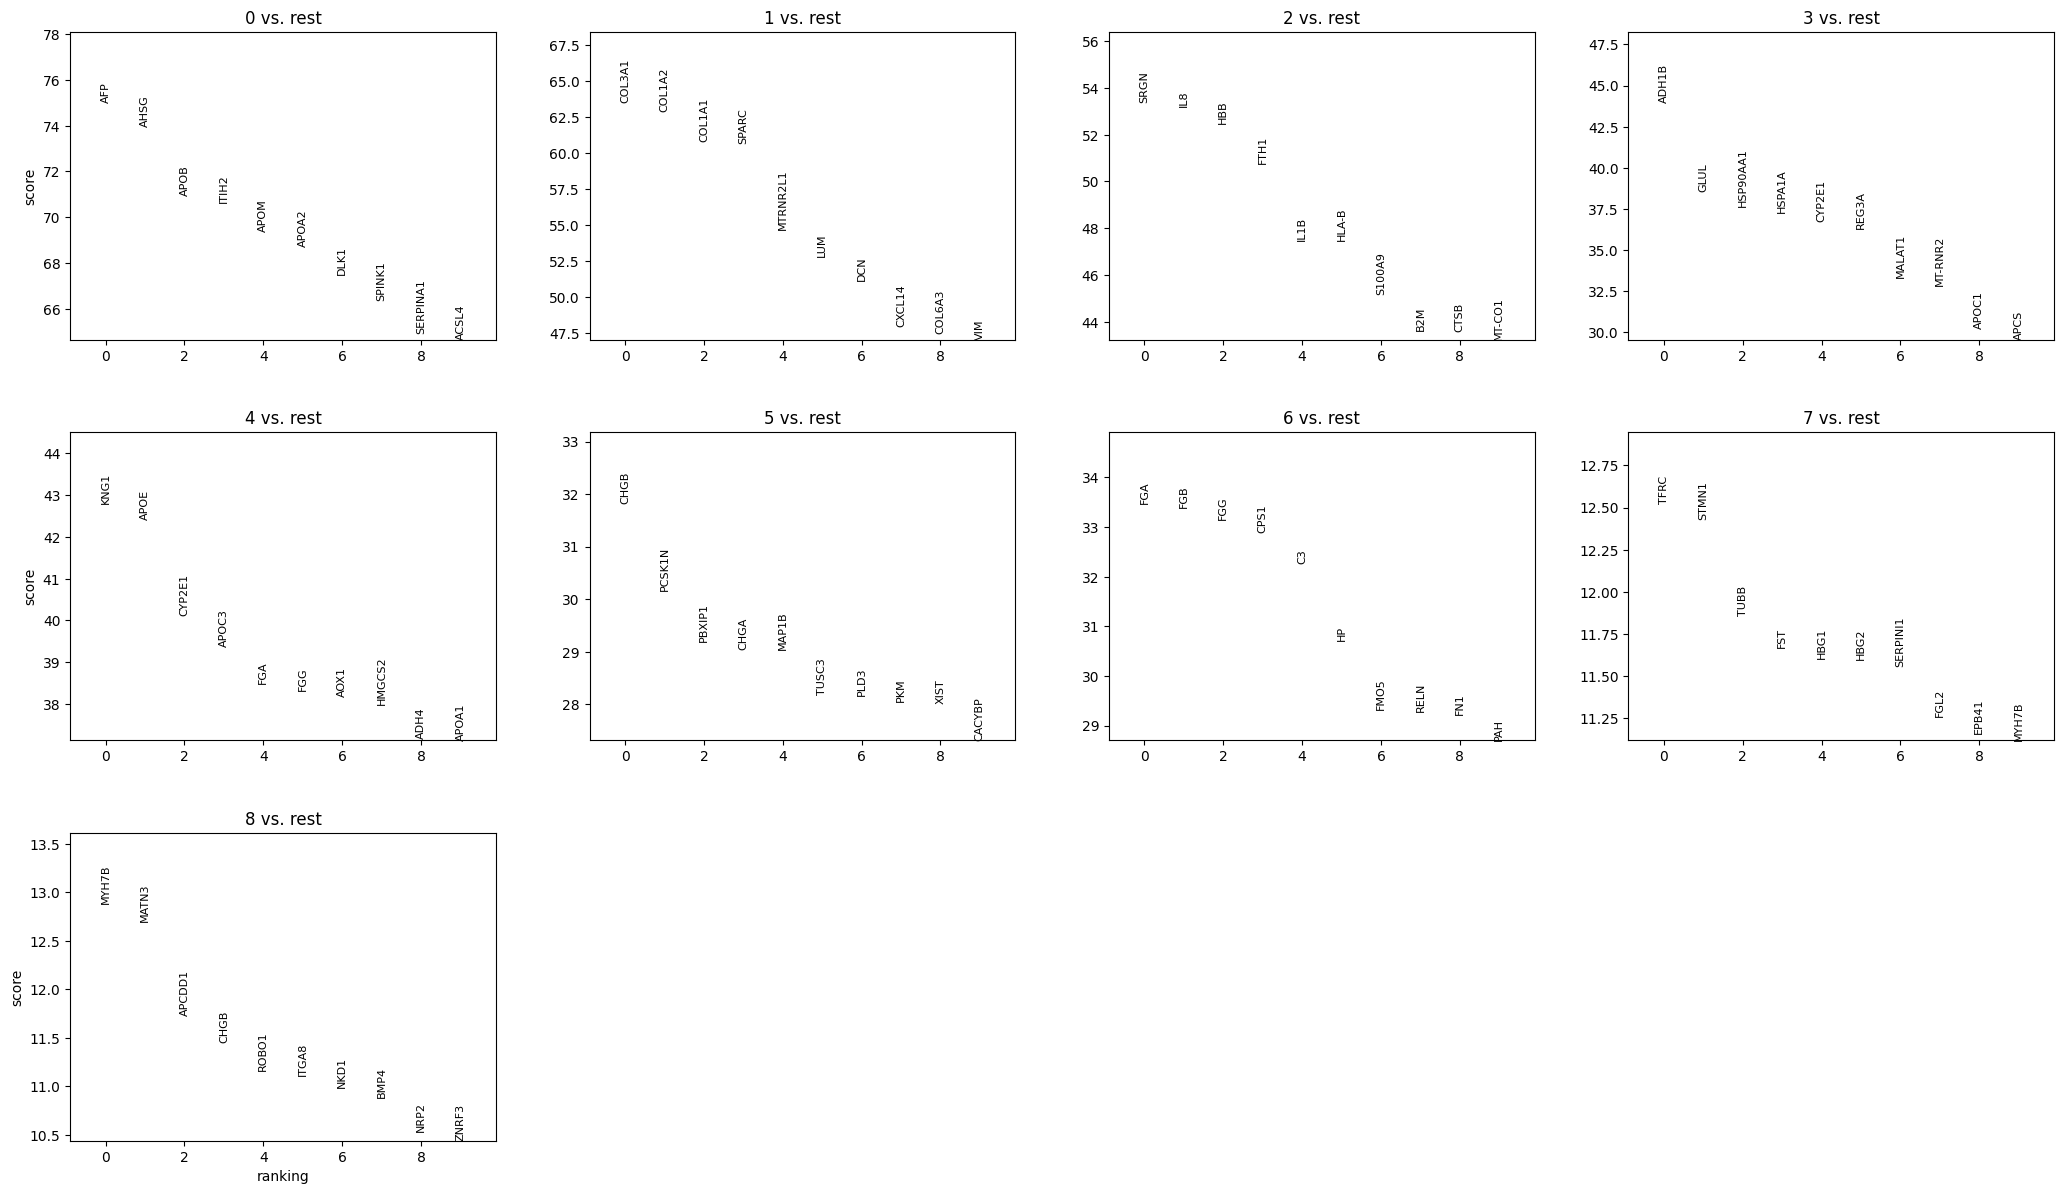

In [4]:

# (Optional) If the dataset is not clustered yet, do this first:
# sc.pp.neighbors(adata)
# sc.tl.leiden(adata)

# Identify differentially expressed genes per cluster
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

# Visualize the top genes (optional plot)
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

# Extract top 10 genes for each cluster
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {g: result['names'][g][:10].tolist() for g in groups}

# Save output for next phase
import json
with open("../outputs/top_genes_by_cluster.json", "w") as f:
    json.dump(top_genes, f, indent=2)